# Modeling with logistic regression

In [80]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
#reading the data
data=pd.read_csv('Data/DirectMarketing_Cln_Classification.csv')

In [82]:
#shape of the data
data.shape

(1000, 15)

In [83]:
#first five rows of the data
data.head()

,Salary,Children,Catalogs,Middle,Old,Young,Female,Male,Own,Rent,Married,Single,Close,Far,Amt_Spnt_Class
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,Low
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,Med
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,Low
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,High
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,Med


In [84]:
print(data.columns)

Index(['Salary', 'Children', 'Catalogs', 'Middle', 'Old', 'Young', 'Female',
       'Male', 'Own', 'Rent', 'Married', 'Single', 'Close', 'Far',
       'Amt_Spnt_Class'],
      dtype='object')


In [85]:
#checking missing values in the data
data.isnull().sum()

Salary            0
Children          0
Catalogs          0
Middle            0
Old               0
Young             0
Female            0
Male              0
Own               0
Rent              0
Married           0
Single            0
Close             0
Far               0
Amt_Spnt_Class    0
dtype: int64

In [86]:
#seperating independent and dependent variables
X = data.drop(['Amt_Spnt_Class'], axis=1)
y = data['Amt_Spnt_Class']


In [87]:
print(X)

     Salary  Children  Catalogs  Middle  Old  Young  Female  Male  Own  Rent  \
0     47500         0         6       0    1      0       1     0    1     0   
1     63600         0         6       1    0      0       0     1    0     1   
2     13500         0        18       0    0      1       1     0    0     1   
3     85600         1        18       1    0      0       0     1    1     0   
4     68400         0        12       1    0      0       1     0    1     0   
..      ...       ...       ...     ...  ...    ...     ...   ...  ...   ...   
995   19400         1        18       0    0      1       1     0    0     1   
996   40500         1        18       1    0      0       0     1    0     1   
997   44800         0        24       0    1      0       0     1    1     0   
998   79000         2        18       1    0      0       0     1    1     0   
999   53600         1        24       0    0      1       0     1    0     1   

     Married  Single  Close  Far  
0   

In [88]:
print(y)

0       Low
1       Med
2       Low
3      High
4       Med
       ... 
995     Low
996     Med
997     Med
998     Low
999     Med
Name: Amt_Spnt_Class, Length: 1000, dtype: object


In [89]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [90]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [91]:
# distribution in training set
y_train.value_counts(normalize=True)

Low     0.501333
Med     0.249333
High    0.249333
Name: Amt_Spnt_Class, dtype: float64

In [92]:
# distribution in validation set
y_valid.value_counts(normalize=True)

Low     0.500
High    0.252
Med     0.248
Name: Amt_Spnt_Class, dtype: float64

In [93]:
#shape of training set
X_train.shape, y_train.shape

((750, 14), (750,))

In [94]:
#shape of validation set
X_valid.shape, y_valid.shape

((250, 14), (250,))

In [95]:
#importing decision tree classifier 
from sklearn.linear_model import LogisticRegression

In [96]:
#creating the Logistic regression model
logreg_model = LogisticRegression(random_state=10)

In [97]:
#fitting the model
logreg_model.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
#checking the training score
logreg_model.score(X_train, y_train)

0.672

In [99]:
#checking the validation score
logreg_model.score(X_valid, y_valid)

0.696

In [100]:
#predictions on validation set
y_pred = logreg_model.predict(X_valid)
y_pred

array(['Low', 'Med', 'Low', 'Low', 'Low', 'Low', 'Med', 'Low', 'Low',
       'Low', 'Low', 'Med', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Med', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'Med', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Med', 'High',
       'Low', 'Low', 'Med', 'High', 'Low', 'Low', 'Low', 'Med', 'High',
       'Med', 'High', 'High', 'Med', 'Low', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Med', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Med',
       'Med', 'Low', 'High', 'Low', 'High', 'Med', 'High', 'High', 'Low',
       'Low', 'Low', 'Low', 'High', 'High', 'Med', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'L

In [101]:
from sklearn import metrics 

conf_matrix_logreg = pd.DataFrame(metrics.confusion_matrix(y_valid, y_pred, labels=['High','Med','Low']), index = ['actual high', 'actual med', 'actual low'], 
                               columns = ['predicted high', 'predicted med', 'predicted low'])

conf_matrix_logreg

,predicted high,predicted med,predicted low
actual high,56,0,7
actual med,17,9,36
actual low,5,11,109


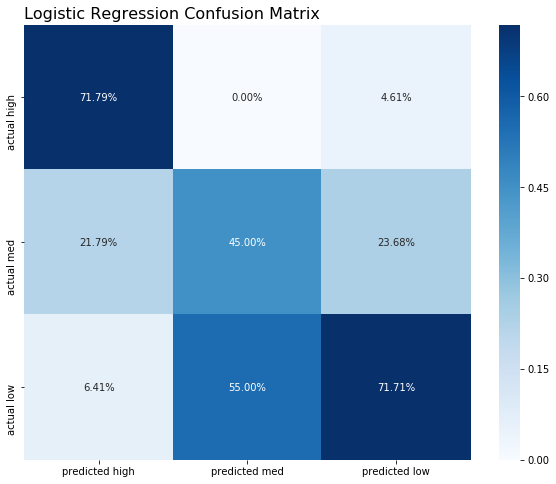

In [102]:
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(conf_matrix_dt/np.sum(conf_matrix_logreg), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Logistic Regression Confusion Matrix', fontsize = 16, loc='left')

plt.show()

In [103]:
logreg_model.predict_proba(X_valid)

array([[0.04991133, 0.48566672, 0.46442195],
       [0.14264006, 0.40206174, 0.4552982 ],
       [0.23742856, 0.53277704, 0.2297944 ],
       [0.03012338, 0.55847298, 0.41140364],
       [0.00569405, 0.60230812, 0.39199783],
       [0.0840044 , 0.51801144, 0.39798416],
       [0.26873768, 0.34742885, 0.38383347],
       [0.09170065, 0.47735607, 0.43094328],
       [0.24608111, 0.49677239, 0.2571465 ],
       [0.18952864, 0.59056946, 0.21990189],
       [0.00656584, 0.58565507, 0.40777909],
       [0.19214299, 0.32000692, 0.48785009],
       [0.04574375, 0.561974  , 0.39228226],
       [0.55546401, 0.25128165, 0.19325434],
       [0.70191822, 0.14177007, 0.15631171],
       [0.62749748, 0.1476703 , 0.22483222],
       [0.63979755, 0.17029517, 0.18990728],
       [0.08273813, 0.52463364, 0.39262823],
       [0.39586551, 0.32635202, 0.27778247],
       [0.00848693, 0.64983579, 0.34167727],
       [0.00531762, 0.60547707, 0.38920532],
       [0.27931432, 0.34573722, 0.37494846],
       [0.

In [104]:
y_pred_prob = logreg_model.predict_proba(X_valid)[:,1]

In [105]:
y_pred_prob

array([0.48566672, 0.40206174, 0.53277704, 0.55847298, 0.60230812,
       0.51801144, 0.34742885, 0.47735607, 0.49677239, 0.59056946,
       0.58565507, 0.32000692, 0.561974  , 0.25128165, 0.14177007,
       0.1476703 , 0.17029517, 0.52463364, 0.32635202, 0.64983579,
       0.60547707, 0.34573722, 0.22831966, 0.20809369, 0.65219927,
       0.65140295, 0.41265699, 0.20656847, 0.3925845 , 0.47825947,
       0.58565053, 0.50261247, 0.50727698, 0.24699698, 0.18558591,
       0.43011566, 0.4955312 , 0.30104966, 0.22240619, 0.19430214,
       0.54485428, 0.52152174, 0.25742476, 0.50122532, 0.61112945,
       0.40594012, 0.57136863, 0.38358431, 0.58209027, 0.44460107,
       0.3701805 , 0.63657445, 0.47204438, 0.24415943, 0.3929714 ,
       0.52577953, 0.35303788, 0.18318332, 0.60390349, 0.61011892,
       0.54875033, 0.24626413, 0.32353514, 0.43030074, 0.28363607,
       0.14783418, 0.29177969, 0.39118479, 0.42154704, 0.18962946,
       0.44587895, 0.49452081, 0.28627565, 0.67285234, 0.34645

In [106]:
# accuracy score
metrics.accuracy_score(y_valid, y_pred)

0.696

In [107]:
# recall
metrics.recall_score(y_valid, y_pred, average=None)

array([0.88888889, 0.872     , 0.14516129])

In [108]:
# precision score
metrics.precision_score(y_valid, y_pred, average=None)

array([0.71794872, 0.71710526, 0.45      ])

reference:

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a